In [4]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [5]:
# @title EXPLORATORY DATA ANALYSIS
# Loading the data from a file
stocks_data = pd.read_csv('stocks (1).csv')
# Show the first few rows and basic information about the data
data_info = stocks_data.info() # Changed 'data' to 'stocks_data'
data_head = stocks_data.head() # Changed 'data' to 'stocks_data'
data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     248 non-null    object 
 1   Date       248 non-null    object 
 2   Open       248 non-null    float64
 3   High       248 non-null    float64
 4   Low        248 non-null    float64
 5   Close      248 non-null    float64
 6   Adj Close  248 non-null    float64
 7   Volume     248 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 15.6+ KB


(None,
   Ticker        Date        Open        High         Low       Close  \
 0   AAPL  2023-02-07  150.639999  155.229996  150.639999  154.649994   
 1   AAPL  2023-02-08  153.880005  154.580002  151.169998  151.919998   
 2   AAPL  2023-02-09  153.779999  154.330002  150.419998  150.869995   
 3   AAPL  2023-02-10  149.460007  151.339996  149.220001  151.009995   
 4   AAPL  2023-02-13  150.949997  154.259995  150.919998  153.850006   
 
     Adj Close    Volume  
 0  154.414230  83322600  
 1  151.688400  64120100  
 2  150.639999  56007100  
 3  151.009995  57450700  
 4  153.850006  62199000  )

In [6]:
stocks_data.Ticker.value_counts()

,count
Ticker,
AAPL,62
MSFT,62
NFLX,62
GOOG,62


In [7]:
descriptive_stats = stocks_data.groupby('Ticker')
descriptive_stats['Close'].describe()

,count,mean,std,min,25%,50%,75%,max
Ticker,,,,,,,,
AAPL,62.0,158.240645,7.360485,145.309998,152.077499,158.055000,165.162506,173.570007
GOOG,62.0,100.631532,6.279464,89.349998,94.702501,102.759998,105.962503,109.459999
MSFT,62.0,275.039839,17.676231,246.270004,258.742500,275.810013,287.217506,310.649994
NFLX,62.0,327.614677,18.554419,292.760010,315.672493,325.600006,338.899994,366.829987


In [8]:
# Sort the data by the 'Volume' column in descending order
sorted_data_volume = stocks_data.sort_values(by='Volume', ascending=False) # Changed 'data' to 'stocks_data'
# Display the top 5 rows with the highest trading volume
top_5_volume = sorted_data_volume[['Ticker', 'Date', 'Volume']].head(5)
# Print the top 5 dates with the most stocks sold
print("Top 5 dates with the most stocks sold:")
print(top_5_volume)

Top 5 dates with the most stocks sold:
    Ticker        Date     Volume
61    AAPL  2023-05-05  113316400
27    AAPL  2023-03-17   98944600
188   GOOG  2023-02-09   97798600
18    AAPL  2023-03-06   87558000
23    AAPL  2023-03-13   84457100


In [9]:
# Calculate the profit for each stock (difference between closing price and opening price)
stocks_data['Profit'] = stocks_data['Close'] - stocks_data['Open'] # Changed 'data' to 'stocks_data'
# Group by the stock ticker and sum the total profit for each stock
stock_profit = stocks_data.groupby('Ticker')['Profit'].sum().sort_values(ascending=False) # Changed 'data' to 'stocks_data'
# Display the profit for each stock ticker
print("Total profit for each stock ticker:")
print(stock_profit)

Total profit for each stock ticker:
Ticker
AAPL    28.569946
MSFT    18.839966
GOOG    15.476021
NFLX   -30.749908
Name: Profit, dtype: float64


In [10]:
# Sort the data by the 'High' price in descending order
sorted_data = stocks_data.sort_values(by='High', ascending=False) # Changed 'data' to 'stocks_data'
# Display the top 5 rows with the highest stock prices
top_5_high_prices = sorted_data[['Ticker', 'Date', 'High']].head(5)
# Print the top 5 high prices
print("Top 5 highest stock prices:")
print(top_5_high_prices)


Top 5 highest stock prices:
    Ticker        Date        High
126   NFLX  2023-02-09  373.829987
125   NFLX  2023-02-08  368.190002
124   NFLX  2023-02-07  364.179993
129   NFLX  2023-02-14  363.750000
130   NFLX  2023-02-15  362.880005


In [11]:
# Sort the data by the 'Low' price in ascending order
sorted_data_low = stocks_data.sort_values(by='Low', ascending=True) # Changed 'data' to 'stock_data'
# Display the top 5 rows with the lowest stock prices
top_5_low_prices = sorted_data_low[['Ticker', 'Date', 'Low']].head(5)
# Print the top 5 least low stock prices
print("Top 5 least low stock prices:")
print(top_5_low_prices)

Top 5 least low stock prices:
    Ticker        Date        Low
198   GOOG  2023-02-24  88.860001
200   GOOG  2023-02-28  89.519997
199   GOOG  2023-02-27  89.610001
202   GOOG  2023-03-02  89.769997
201   GOOG  2023-03-01  89.849998


In [14]:
# @title LINEAR REGRESSION
# Convert the 'Date' column to datetime format
# Changed the format string to '%Y-%m-%d' to match the actual date format in the data
stocks_data['Date'] = pd.to_datetime(stocks_data['Date'], format='%Y-%m-%d')

In [15]:
# Convert dates to ordinal (numeric) values for regression
stocks_data['Date_ordinal'] = stocks_data['Date'].apply(lambda date: date.toordinal())


In [16]:
# Extract the features (Date) and target variable (Adj Close)
X = stocks_data[['Date_ordinal']]
y = stocks_data['Adj Close']

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
# Predict the target values for test data
y_pred = model.predict(X_test)

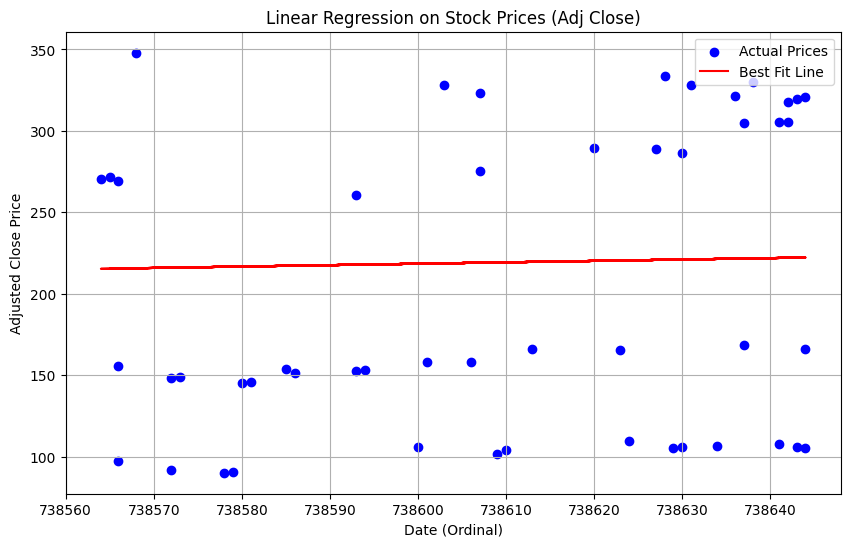

(8310.036359206979, -0.01904293750222852)

In [20]:
# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# Plot the actual vs predicted values and the best-fit line
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.plot(X_test, y_pred, color='red', label='Best Fit Line')
plt.title('Linear Regression on Stock Prices (Adj Close)')
plt.xlabel('Date (Ordinal)')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.grid(True)
plt.show()
mse, r2


In [21]:
# Calculate additional regression metrics: Mean Absolute Error (MAE) and Mean Absolute Percentage Error (MAPE)
from sklearn.metrics import mean_absolute_error
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mae, mape

(87.24663180450487, 56.084177359802545)

In [22]:
# @title LOGISTIC REGRESSION
#Create the binary target variable
stocks_data['Price_Up'] = (stocks_data['Adj Close'].shift(-1) > stocks_data['Adj Close']).astype(int)
# Drop the last row as it won't have a valid comparison
stocks_data = stocks_data.dropna()
# Define the feature set and target variable
X = stocks_data[['Open', 'High', 'Low', 'Close', 'Volume']] # Using numerical features
y = stocks_data['Price_Up']

In [23]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Initialize and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [25]:
# Make predictions on the test set
y_pred = model.predict(X_test)


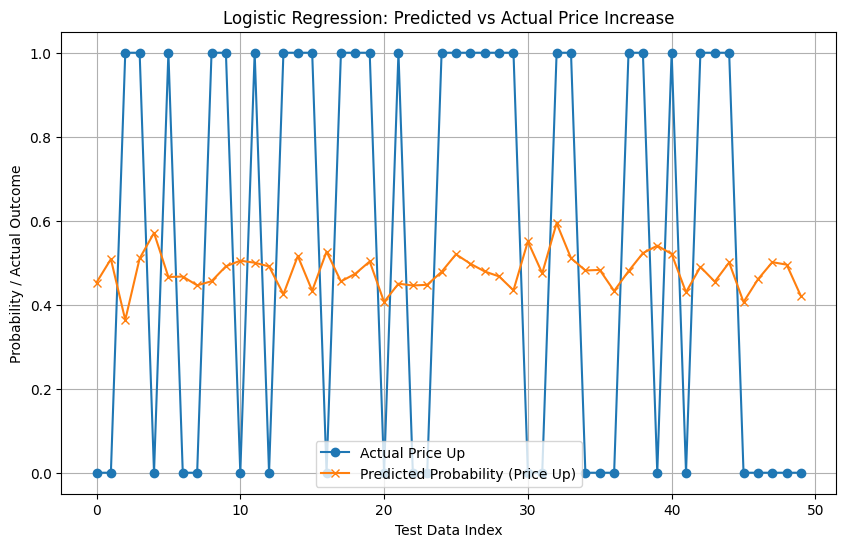

In [26]:
# Initialize and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)
# Get the predicted probabilities for class 1 (Price Up)
y_prob = model.predict_proba(X_test)[:, 1]
# Plot the predicted probabilities and actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test.reset_index(drop=True), label='Actual Price Up', marker='o')
plt.plot(y_prob, label='Predicted Probability (Price Up)', marker='x')
plt.title('Logistic Regression: Predicted vs Actual Price Increase')
plt.xlabel('Test Data Index')
plt.ylabel('Probability / Actual Outcome')
plt.legend()
plt.grid(True)
plt.show()


In [27]:
# Generate the classification report to evaluate performance
classification_report_result = classification_report(y_test, y_pred)
classification_report_result

'              precision    recall  f1-score   support\n\n           0       0.48      0.70      0.57        23\n           1       0.59      0.37      0.45        27\n\n    accuracy                           0.52        50\n   macro avg       0.54      0.53      0.51        50\nweighted avg       0.54      0.52      0.51        50\n'

In [28]:
#time series analysis
#time series analysis
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import pandas as pd
# Convert the existing 'Date' column to datetime
# Check for typos or case sensitivity issues in the column name
stocks_data['Date'] = pd.to_datetime(stocks_data['Date'], format='%d-%m-%Y') # Changed 'Date' to 'date'
pivot_data = stocks_data.pivot(index='Date',columns='Ticker',values='Close')
fig = make_subplots(rows=1,cols=1)
fig.add_trace(go.Scatter(x=pivot_data.index,y=pivot_data['AAPL'],name='AAPL'))
fig.add_trace(go.Scatter(x=pivot_data.index,y=pivot_data['GOOG'],name='GOOG'))
fig.add_trace(go.Scatter(x=pivot_data.index,y=pivot_data['NFLX'],name='NFLX'))
fig.add_trace(go.Scatter(x=pivot_data.index,y=pivot_data['MSFT'],name='MSFT'))
fig.update_layout(
title_text="Time Series of Closing Prices",
xaxis_title='Date',
yaxis_title='Closing Price',
legend_title='Ticker',
showlegend=True
)
fig.show()


In [29]:
# @title VOLATILITY ANALYSIS
#volatility analysis
volatility = pivot_data.std()
fig = px.bar(
volatility,
x=volatility.index,
y=volatility.values,
  labels={
'y':'Standard Deviation',
'x':'Ticker'
},
title='Volatility of Closing Prices (Standard Deviation)'
)
fig.show()


In [30]:
# @title CORRELATION ANALYSIS
#correlation analysis
correlation_matrix = pivot_data.corr()
fig = go.Figure(
data=go.Heatmap(
z=correlation_matrix,
x=correlation_matrix.columns,
y=correlation_matrix.columns,
colorscale='blues',
colorbar=dict(title='correlation'),
text=correlation_matrix.round(2).values,
texttemplate="%{text}"
)
)
fig.update_layout(
title='Correlation Matrix of Closing Prices',
xaxis_title="Ticker",
yaxis_title="Ticker",
)
fig.show()


In [31]:
# @title COMPARITIVE ANALYSIS
#comparitive analysis
# Calculating the percentage change in closing prices
percentage_change = ((pivot_data.iloc[-1] - pivot_data.iloc[0]) / pivot_data.iloc[0]) * 100
fig = px.bar(
percentage_change,
x=percentage_change.index,
y=percentage_change.values,
labels={'y': 'Percentage Change (%)', 'x': 'Ticker'},
title='Percentage Change in Closing Prices'
)
fig.show()

In [32]:
# @title RISK vs RETURN
#daily risks vs return risks
daily_returns = pivot_data.pct_change().dropna()
avg_daily_return = daily_returns.mean()
risk = daily_returns.std()
risk_return_df = pd.DataFrame({'Risk':risk,'Average Daily Return':avg_daily_return})
fig = go.Figure()
fig.add_trace(
go.Scatter(
x=risk_return_df["Risk"],
y=risk_return_df['Average Daily Return'],
mode="markers+text",
text=risk_return_df.index,
textposition="top center",
marker=dict(size=10)
)
)
fig.update_layout(
title='Risk vs. Return Analysis',
xaxis_title='Risk (Standard Deviation)',
yaxis_title='Average Daily Return',
showlegend=False
)
fig.show()

Mean Squared Error: 1.1253739585889782


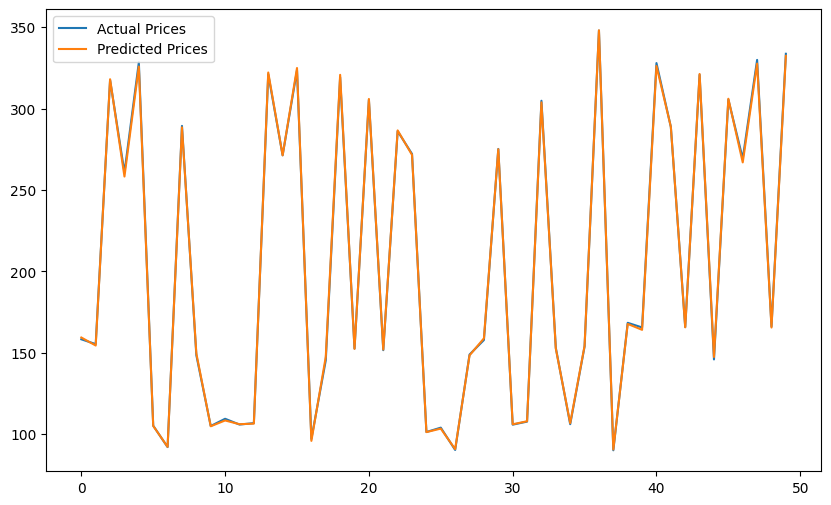

In [33]:
# @title RANDOM FOREST REGRESSION
# Let's assume 'Date' is a column in your dataset and 'Close' is the target feature for prediction
# You may need to adjust the column names based on your dataset
# Convert the 'Date' column to datetime (if present)
if 'Date' in stocks_data.columns:
    # The following two lines were not indented, causing the error
    stocks_data['Date'] = pd.to_datetime(stocks_data['Date'])
    stocks_data.set_index('Date', inplace=True)
# Select features (You can add more relevant features if present in your dataset)
X = stocks_data.drop(['Close'], axis=1) # Features (Remove 'Close' which is the target)
y = stocks_data['Close'] # Target variable
# Perform one-hot encoding for categorical features
X = pd.get_dummies(X)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create and train the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
# Make predictions
y_pred = rf.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
# Plot the actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Prices')
plt.plot(y_pred, label='Predicted Prices')
plt.legend()
plt.show()

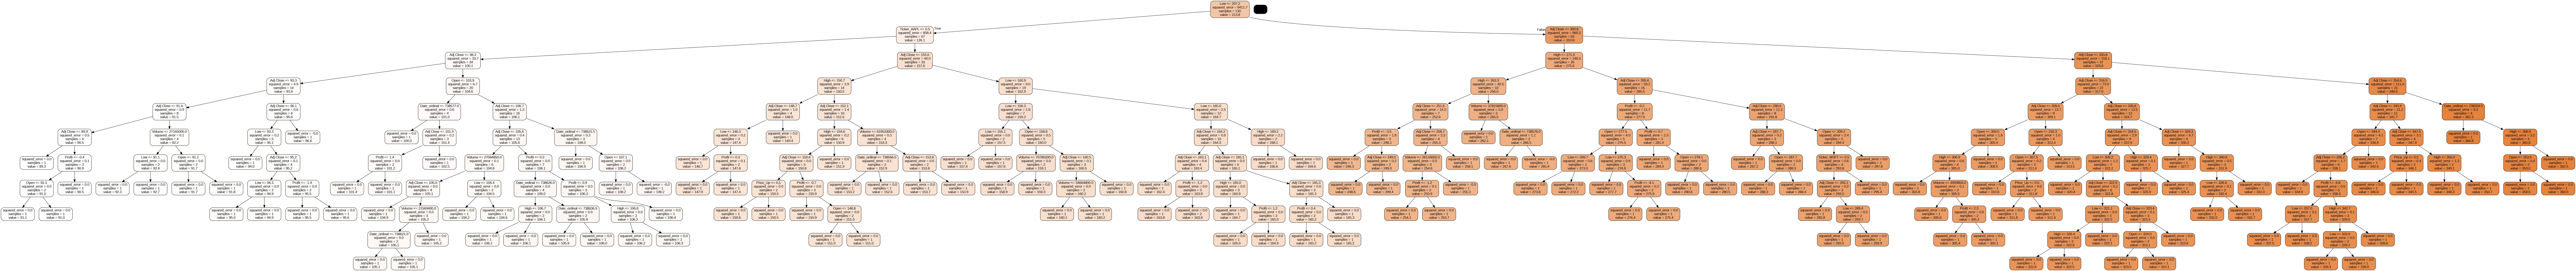

In [34]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

# Choose a tree from the random forest (e.g., the first tree)
tree_to_interpret = rf.estimators_[0]

# Export the tree to a DOT file
export_graphviz(
    tree_to_interpret,
    out_file="tree.dot",
    feature_names=X_train.columns,
    rounded=True,
    precision=1,
    filled=True,
)

# Convert the DOT file to a PNG image
graph = pydotplus.graph_from_dot_file("tree.dot")
Image(graph.create_png())

# Display the tree image
Image(graph.create_png())

In [35]:
# Create and train the Random Forest Regressor with out-of-bag (oob) scoring enabled
rf = RandomForestRegressor(n_estimators=100, random_state=42, oob_score=True)
rf.fit(X_train, y_train)

# Get the out-of-bag score
oob_score = rf.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

Out-of-Bag Score: 0.9996717634738929


In [36]:
oob_error_rate = 1 - rf.oob_score_
print(f"OOB Error Rate: {oob_error_rate}")

OOB Error Rate: 0.0003282365261071396


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



Mean Squared Error (MSE): 1.1253739585889782
Root Mean Squared Error (RMSE): 1.0608364429020047
Mean Absolute Error (MAE): 0.8127456436157252
R-squared (R2): 0.9998620602899904


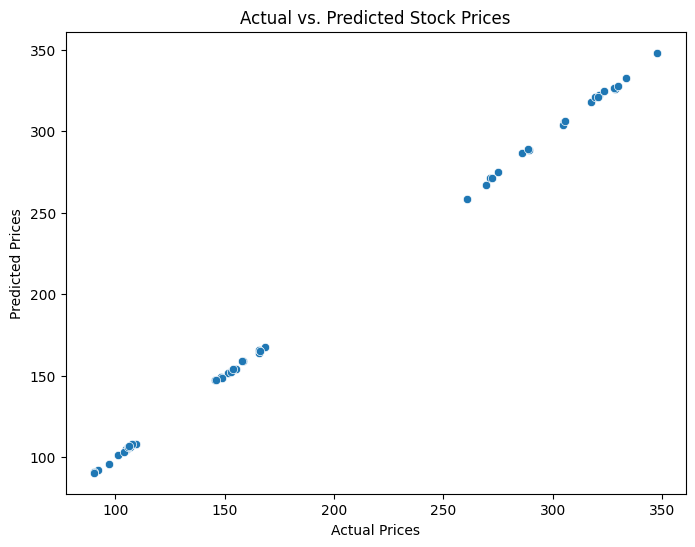

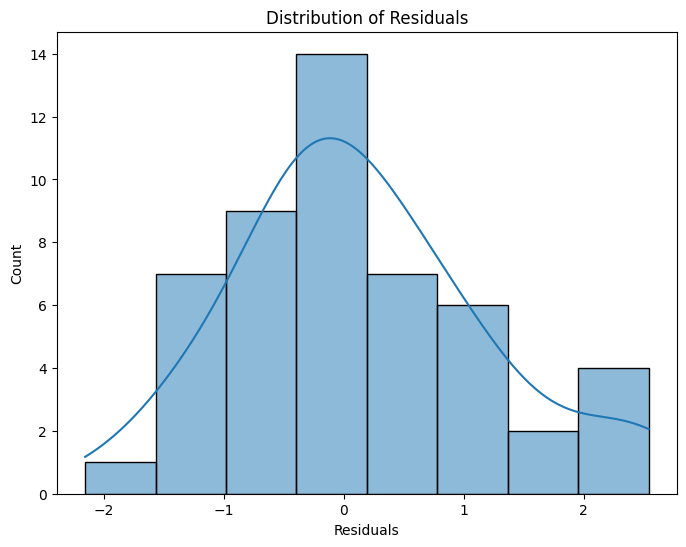

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already loaded and preprocessed your data (stocks_data)



# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the model using regression metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Calculate RMSE
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')



# You can also create a scatter plot to visualize the relationship
# between actual and predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Actual vs. Predicted Stock Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

# Optionally, you can plot residuals (errors)
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.show()

In [38]:
import pandas as pd

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame with feature importances
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
features_df = features_df.sort_values(by='Importance', ascending=False)

print(features_df)

         Feature  Importance
1           High    0.290549
0           Open    0.253695
3      Adj Close    0.223112
2            Low    0.218136
9    Ticker_GOOG    0.007703
8    Ticker_AAPL    0.006439
6   Date_ordinal    0.000278
4         Volume    0.000041
5         Profit    0.000035
7       Price_Up    0.000008
10   Ticker_MSFT    0.000003
11   Ticker_NFLX    0.000001


In [39]:
from sklearn.feature_selection import RFE

# Recursive Feature Elimination
rfe = RFE(estimator=rf, n_features_to_select=10)
rfe.fit(X_train, y_train)

RFE(estimator=RandomForestRegressor(oob_score=True, random_state=42),
    n_features_to_select=10)

In [43]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
rf = RandomForestRegressor(n_estimators=100)
scores = cross_val_score(rf, X, y, cv=5, scoring='r2')

print(f"Cross-validated R2 scores: {scores}")
print(f"Average R2 score: {scores.mean()}")


Cross-validated R2 scores: [-1.72193972  0.8307118   0.93880225  0.99823738  0.53879356]
Average R2 score: 0.31692105572762014


In [44]:
rf = RandomForestRegressor(n_estimators=100, oob_score=True)
rf.fit(X_train, y_train)
print(f"OOB Score: {rf.oob_score_}")


OOB Score: 0.999675120392509


In [45]:
oob_error_rate = 1 - rf.oob_score_
print(f"OOB Error Rate: {oob_error_rate}")

OOB Error Rate: 0.0003248796074909466


In [49]:


# Assign the previous and current OOB error rates
previous_oob_error_rate = 0.0003282365261071396
oob_error_rate = 0.0003248796074909466

print(f"Previous OOB Error Rate: {previous_oob_error_rate}")
print(f"Current OOB Error Rate: {oob_error_rate}")

if oob_error_rate < previous_oob_error_rate:
  print("The current model has a lower OOB error rate, indicating potential improvement.")
elif oob_error_rate > previous_oob_error_rate:
  print("The current model has a higher OOB error rate, indicating potential degradation.")
else:
  print("The OOB error rates are the same.")

# Update the previous_oob_error_rate for future comparisons
previous_oob_error_rate = oob_error_rate

# Re-train the model and calculate new OOB error rate (if needed)
# rf = RandomForestRegressor(n_estimators=100, oob_score=True)
# rf.fit(X_train, y_train)
# oob_error_rate = 1 - rf.oob_score_
# print(f"New OOB Error Rate: {oob_error_rate}")

Previous OOB Error Rate: 0.0003282365261071396
Current OOB Error Rate: 0.0003248796074909466
The current model has a lower OOB error rate, indicating potential improvement.


In [52]:
# prompt: accuracy of the current model

# Assuming you have already trained your Random Forest model (rf) and have y_test and y_pred

from sklearn.metrics import r2_score # Import r2_score instead of accuracy_score

# Since you're working with a regression problem, use r2_score
# to evaluate the model's performance.
r2 = r2_score(y_test, y_pred) # Assuming y_pred is the continuous prediction from the model
print(f"R-squared of the model: {r2}")

# You can also consider other regression metrics like mean squared error (MSE) or
# mean absolute error (MAE) depending on your specific needs.

from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

R-squared of the model: 0.9998620602899904
Mean Squared Error: 1.1253739585889782
Mean Absolute Error: 0.8127456436157252


In [19]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime

# Load the dataset
data = pd.read_csv('stocks (1).csv')

# Preprocess the data
# Convert Date to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Define features (X) and target (y)
X = data[['Open', 'High', 'Low', 'Volume']]  # Features
y = data['Close']  # Target variable

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Function to get actual and predicted closing price for a given date
def get_closing_price(date_str):
    # Convert the input date string to a datetime object
    input_date = pd.to_datetime(date_str)

    # Find the row for the given date
    row = data.loc[data['Date'] == input_date]

    if row.empty:
        # Instead of returning None, try to find the closest date:
        closest_date = data['Date'].loc[(data['Date'] - input_date).abs().idxmin()]
        print(f"No data available for {date_str}. Using closest date: {closest_date.strftime('%Y-%m-%d')}")
        row = data.loc[data['Date'] == closest_date]

    # Get the actual closing price
    actual_close = row['Close'].values[0]

    # Extract features for prediction (Open, High, Low, Volume)
    features = row[['Open', 'High', 'Low', 'Volume']].values

    # Predict the closing price
    predicted_close = model.predict(features)[0]

    # Return actual and predicted closing price
    return actual_close, predicted_close



# Example usage
date_input = input("Enter the date (YYYY-MM-DD): ")
actual_close, predicted_close = get_closing_price(date_input)

# Check if data was found before printing
if actual_close is not None and predicted_close is not None:
    print(f"Actual Closing Price on {date_input}: {actual_close}")
    print(f"Predicted Closing Price on {date_input}: {predicted_close}")
else:
    print(f"No data available for the date: {date_input}") # Print the message if no data


Enter the date (YYYY-MM-DD): 2023-03-31
Actual Closing Price on 2023-03-31: 164.89999389648438
Predicted Closing Price on 2023-03-31: 164.47329666137696


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
